In [54]:

%pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


import seaborn as sns

In [56]:

file_path = "./data/Internships.xlsx"

try:
    # Read the Excel file
    df = pd.read_excel(file_path, engine='openpyxl')  # Use engine='openpyxl' for modern Excel files
    print(df.head())  # Display the first few rows
except Exception as e:
    print(f"Erreur lors de la lecture du fichier Excel : {e}")


   ID          Start time     Completion time      Email  Name  \
0   1 2024-11-13 11:26:49 2024-11-13 11:28:09  anonymous   NaN   
1   2 2024-11-13 11:27:51 2024-11-13 11:30:38  anonymous   NaN   
2   3 2024-11-13 11:29:23 2024-11-13 11:35:05  anonymous   NaN   
3   4 2024-11-13 11:30:27 2024-11-13 11:35:37  anonymous   NaN   
4   5 2024-11-13 11:41:19 2024-11-13 11:43:02  anonymous   NaN   

   Last modified time What is your gender?\n What is your year of studies?\n  \
0                 NaN                    Man                        4th year   
1                 NaN                  Woman                        4th year   
2                 NaN                    Man                        3rd year   
3                 NaN                  Woman                        4th year   
4                 NaN                    Man                5th year or more   

  What is your field of study?  \
0                 Engineering    
1                 Engineering    
2                 he

In [57]:
# Clean column names by removing newlines and extra spaces
df.columns = df.columns.str.replace('\n', ' ', regex=True).str.strip()

# Display cleaned column names
print(df.columns)

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'What is your gender?',
       'What is your year of studies?', 'What is your field of study?',
       'What is the typical duration of your internships ( in weeks ) ?',
       'How many internships have you completed?',
       'On a scale of 1 to 10, how important do you believe internships are in building your professional network?',
       'How would you rate the adequacy of your university's career support?',
       'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
       'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships  searching?',
       'How did your integration within the team of the Internships go?',
       'Did you find that team members were available to answer your questions?'],
      dtype='object')


In [58]:
# Check for missing values in a DataFrame
missing_data = df.isnull().sum()
print(missing_data)


ID                                                                                                                                          0
Start time                                                                                                                                  0
Completion time                                                                                                                             0
Email                                                                                                                                       0
Name                                                                                                                                       61
Last modified time                                                                                                                         61
What is your gender?                                                                                                                        0
What i

In [59]:
# Check unique values in the 'Name' column to better understand the missing data
print(df['Name'].unique())

[nan]


In [60]:
#Handling Missing Values:
#if there is any missing values we use the following statment tofull fill it

# Replace missing values for numerical data with the median
#df['duration_of_internships'].fillna(df['duration_of_internships'].median(), inplace=True)

# Replace missing values for categorical data with the mode
#df['gender'].fillna(df['gender'].mode()[0], inplace=True)


In [61]:
# if we have data missing from columns we use
#Drop columns with more than 70% missing data
#df.dropna(thresh=df.shape[0] * 0.7, axis=1, inplace=True)


In [62]:

# Drop the 'Last modified time' column
df = df.drop(columns=['Last modified time'])
# Drop the  column
df = df.drop(columns=['Email'])

# Drop the 'Name' column
df = df.drop(columns=['Name'])
df = df.drop(columns=['Completion time'])
df = df.drop(columns=['Start time'])



In [63]:
# Verify if the columns was removed
print(df.head())

   ID What is your gender? What is your year of studies?  \
0   1                  Man                      4th year   
1   2                Woman                      4th year   
2   3                  Man                      3rd year   
3   4                Woman                      4th year   
4   5                  Man              5th year or more   

  What is your field of study?  \
0                 Engineering    
1                 Engineering    
2                 health field   
3                 Engineering    
4                 Architecture   

   What is the typical duration of your internships ( in weeks ) ?  \
0                                                  5                 
1                                                  6                 
2                                                  4                 
3                                                  7                 
4                                                  5                 

   How many i

In [64]:
# Display the entire DataFrame (use with caution for large DataFrames)
#print("\nEntire DataFrame:")
#print(df)

In [65]:
# Standardize categorical values (e.g., gender)
df['What is your gender?'] = df['What is your gender?'].str.strip().str.title()

# Check for unique values to ensure standardization worked
print(df['What is your gender?'].unique())

['Man' 'Woman']


In [66]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)  # Clip values outside the bounds
    return data

# Identify numerical columns in the dataset
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with only the numerical columns
numerical_df = df[numerical_cols]

# Apply the outlier handling function to each numerical column
for col in numerical_cols:
    numerical_df = handle_outliers_iqr(numerical_df, col)

# Save the cleaned numerical DataFrame to an Excel file
numerical_output_path = "numerical_data.xlsx"  # Replace with your desired output file name
numerical_df.to_excel(numerical_output_path, index=False)

# Print the processed DataFrame
print("Processed Numerical DataFrame:")
print(numerical_df)


Processed Numerical DataFrame:
    ID  What is the typical duration of your internships ( in weeks ) ?  \
0    1                                                  5                 
1    2                                                  6                 
2    3                                                  4                 
3    4                                                  7                 
4    5                                                  5                 
..  ..                                                ...                 
56  57                                                 14                 
57  58                                                  8                 
58  59                                                  6                 
59  60                                                  8                 
60  61                                                  5                 

    How many internships have you completed?  \
0                   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\226709839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].clip(lower_bound, upper_bound)  # Clip values outside the bounds
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\226709839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].clip(lower_bound, upper_bound)  # Clip values outside the bounds
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\226709839.py:7: SettingWithCopyWarning: 
A value 

In [67]:

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Exclude any columns you don't want to encode (e.g., ID columns)
exclude_cols = ['Name']  # Add any other columns to exclude if needed
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Create a dictionary to store LabelEncoder mappings
label_encoders = {}

# Create a DataFrame with only the categorical columns
categorical_df = df[categorical_cols]

# Iterate over categorical columns and encode them
for col in categorical_cols:
    if col in df.columns:  # Check if the column still exists
        label_encoder = LabelEncoder()
        categorical_df[col] = label_encoder.fit_transform(categorical_df[col])
        label_encoders[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    else:
        print(f"Column '{col}' not found in the DataFrame. Skipping encoding.")

# Print the encoded categorical DataFrame
print(categorical_df)

# Print the LabelEncoder mappings for reference
for col, mapping in label_encoders.items():
    print(f"Mapping for '{col}': {mapping}")

# Save the cleaned categorical DataFrame to an Excel file
categorical_output_path = "./data/categorical_data.xlsx"  # Replace with your desired output file name
categorical_df.to_excel(categorical_output_path, index=False)



    What is your gender?  What is your year of studies?  \
0                      0                              0   
1                      1                              0   
2                      0                              2   
3                      1                              0   
4                      0                              3   
..                   ...                            ...   
56                     0                              3   
57                     0                              1   
58                     1                              0   
59                     1                              2   
60                     1                              0   

    What is your field of study?  \
0                              2   
1                              2   
2                              5   
3                              2   
4                              0   
..                           ...   
56                             2   
57 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2362769096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col] = label_encoder.fit_transform(categorical_df[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2362769096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[col] = label_encoder.fit_transform(categorical_df[col])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2362769096.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

# **Descriptive Statistics:**  

**Numerical Data:**

In [68]:
 # Summary statistics for numerical columns
# Load the cleaned numerical data from the Excel file
numerical_df = pd.read_excel("./data/numerical_data.xlsx")

# Drop the 'ID' column if it exists in the dataframe
numerical_df = numerical_df.drop(columns=['ID'], errors='ignore')  # 'errors=ignore' ensures no error if 'ID' doesn't exist

# Get summary statistics for numerical columns
numerical_stats = numerical_df.describe()

# Print summary statistics
print("Summary statistics for numerical columns:")
print(numerical_stats)

# Save the summary statistics to an Excel file
numerical_stats.to_excel("./data/numerical_summary_statistics.xlsx")


Summary statistics for numerical columns:
       What is the typical duration of your internships ( in weeks ) ?  \
count                                          61.000000                 
mean                                            6.508197                 
std                                             3.165559                 
min                                             0.000000                 
25%                                             4.000000                 
50%                                             6.000000                 
75%                                             8.000000                 
max                                            14.000000                 

       How many internships have you completed?  \
count                                 61.000000   
mean                                   2.155738   
std                                    0.942253   
min                                    0.500000   
25%                                 

** *Bar Plot for Means* **

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2494841800.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to ensure everything fits


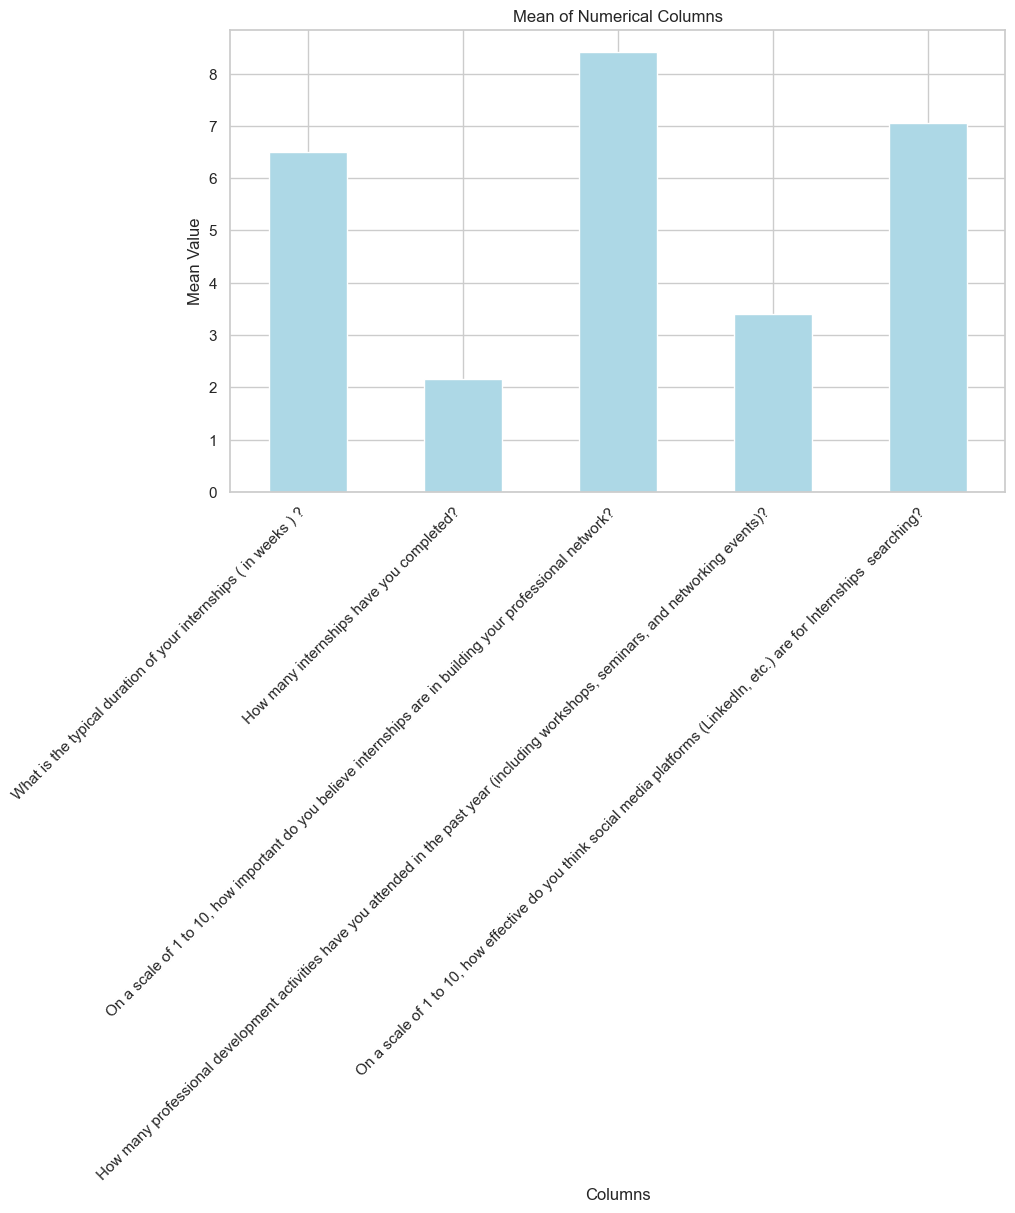

In [69]:

# Plot the mean of numerical columns
mean_values = numerical_stats.loc['mean']  # Extract the mean values

# Plot the bar chart
plt.figure(figsize=(10,6))  # Optional: Adjust figure size for better readability
numerical_stats.loc['mean'].plot(kind='bar', color='lightblue')

# Set chart title and labels
plt.title('Mean of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Mean Value')

# Adjust the x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


**Boxplots**  known as box-and-whisker plots are especially useful for comparing distributions across multiple variables or groups, as they provide a concise visual summary of key statistical information.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\254163836.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to ensure everything fits


<Figure size 1200x800 with 0 Axes>

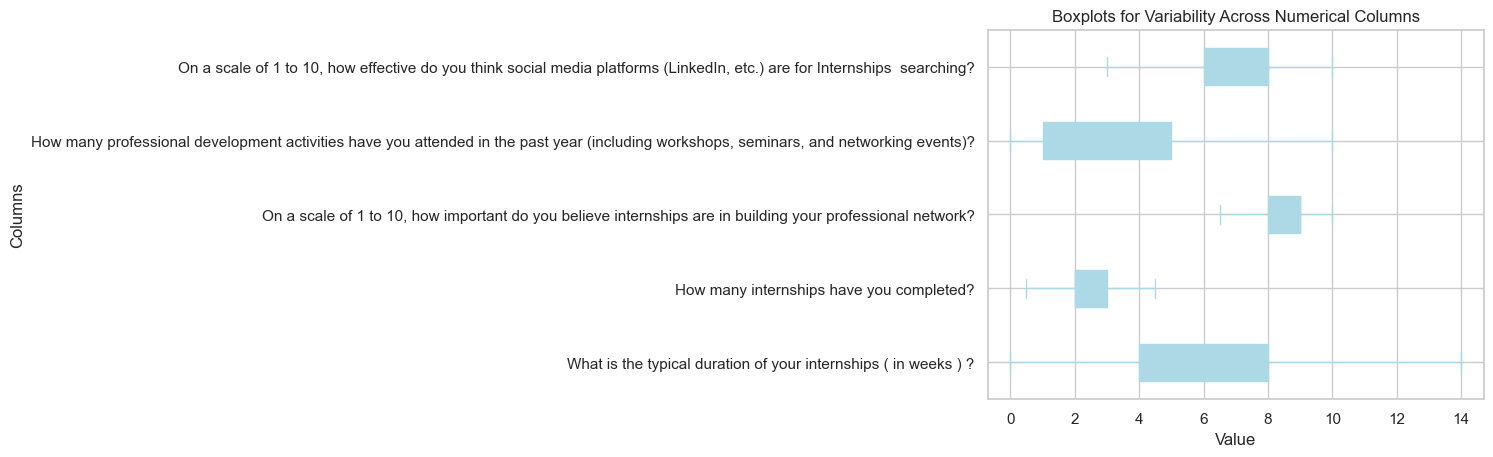

In [70]:
# Plot boxplots for each numerical column
plt.figure(figsize=(12,8))  # Optional: Adjust figure size for better readability
numerical_df.plot(kind='box', vert=False, color='lightblue', patch_artist=True)

# Set chart title and labels
plt.title('Boxplots for Variability Across Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Columns')

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\3798124153.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


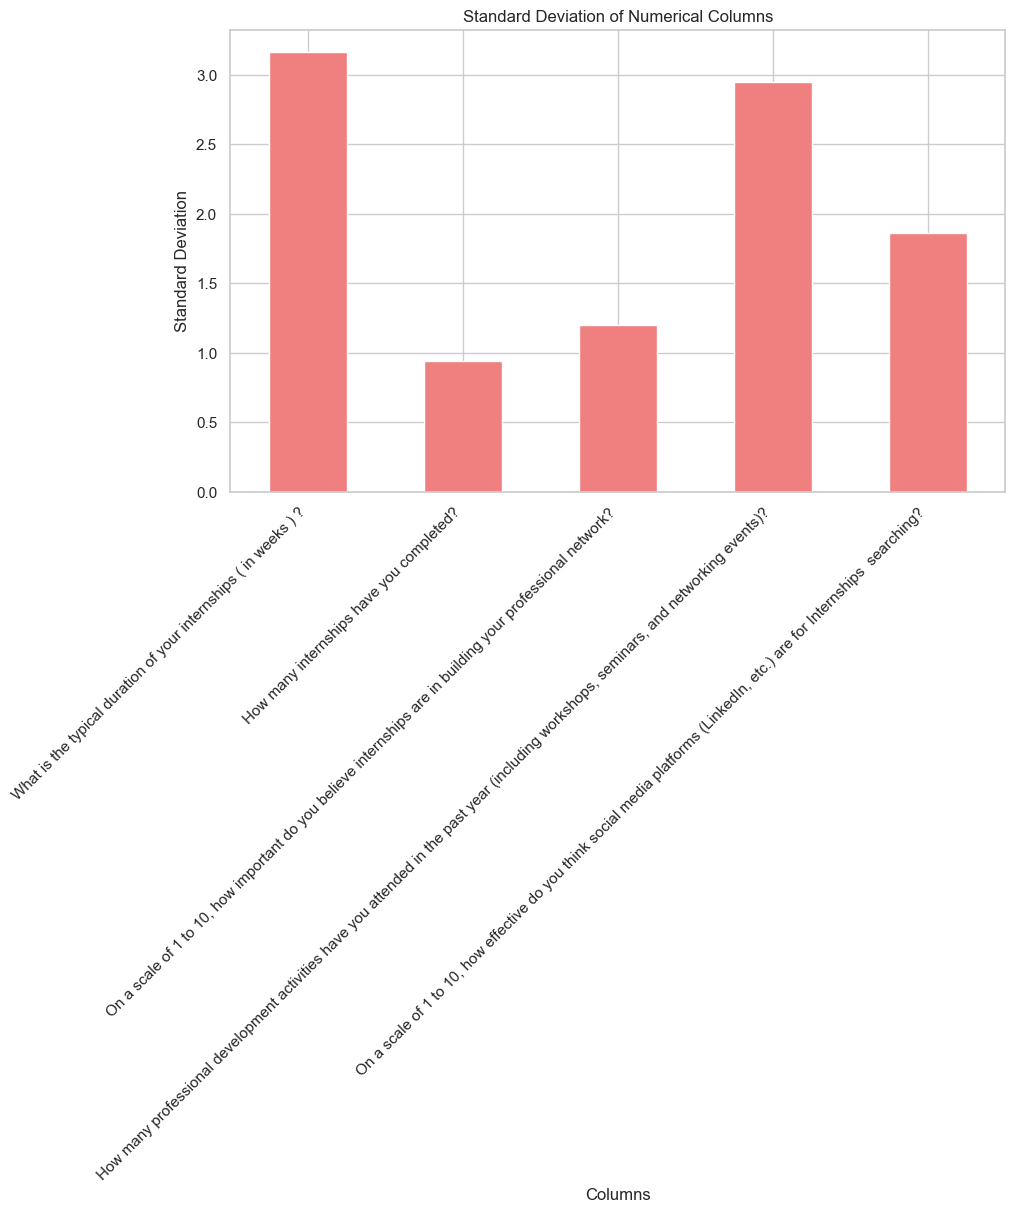

In [71]:

# Calculate the standard deviation for each column
std_devs = numerical_df.std()

# Plot the standard deviation values
plt.figure(figsize=(10, 6))
std_devs.plot(kind='bar', color='lightcoral')
plt.title('Standard Deviation of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**categorical Data**

In [72]:


# Set plot style
sns.set(style="whitegrid")

In [73]:

# Print the cleaned column names to verify
print(df.columns)


Index(['ID', 'What is your gender?', 'What is your year of studies?',
       'What is your field of study?',
       'What is the typical duration of your internships ( in weeks ) ?',
       'How many internships have you completed?',
       'On a scale of 1 to 10, how important do you believe internships are in building your professional network?',
       'How would you rate the adequacy of your university's career support?',
       'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
       'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships  searching?',
       'How did your integration within the team of the Internships go?',
       'Did you find that team members were available to answer your questions?'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\1213256307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your gender?', data=df, palette="Set2")


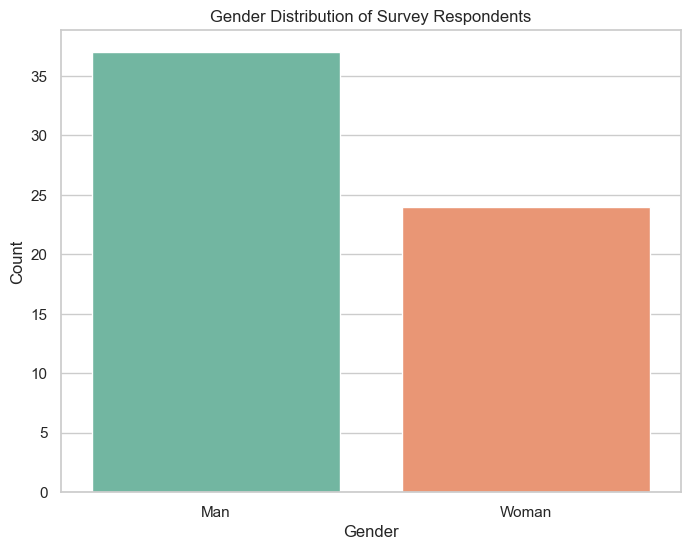

In [74]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your gender?', data=df, palette="Set2")
plt.title('Gender Distribution of Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\1919092128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your year of studies?', data=df, palette="Set3")


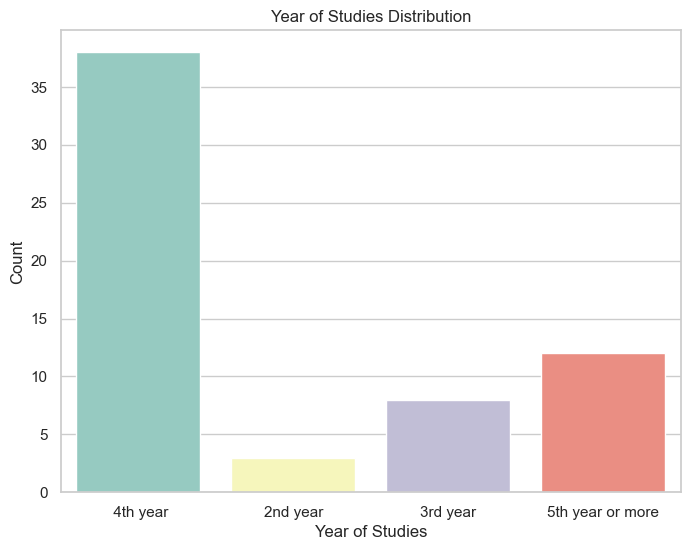

In [75]:
#What is your year of studies?
df['What is your year of studies?'] = df['What is your year of studies?'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(x='What is your year of studies?', data=df, palette="Set3")
plt.title('Year of Studies Distribution')
plt.xlabel('Year of Studies')
plt.ylabel('Count')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2755732231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your field of study?', data=df, palette="Set1")


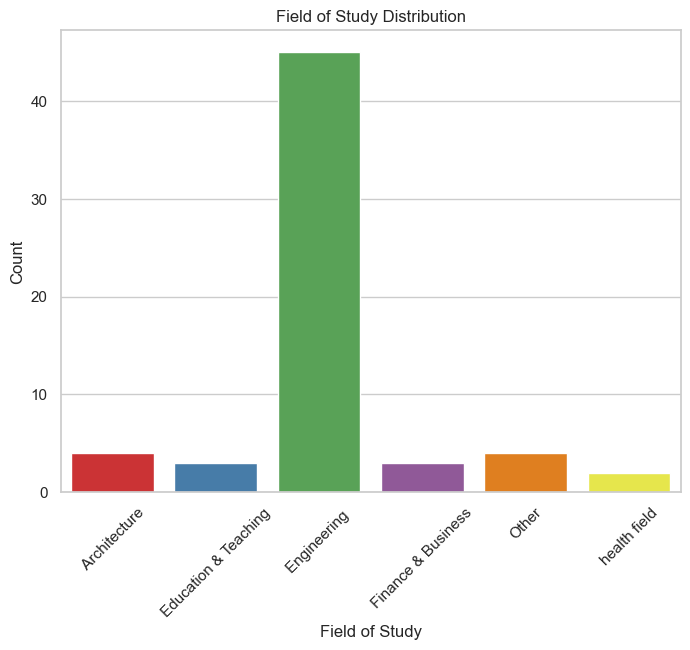

In [76]:
df['What is your field of study?'] = df['What is your field of study?'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(x='What is your field of study?', data=df, palette="Set1")
plt.title('Field of Study Distribution')
plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\1899811171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="How would you rate the adequacy of your university's career support?", data=df, palette="viridis")


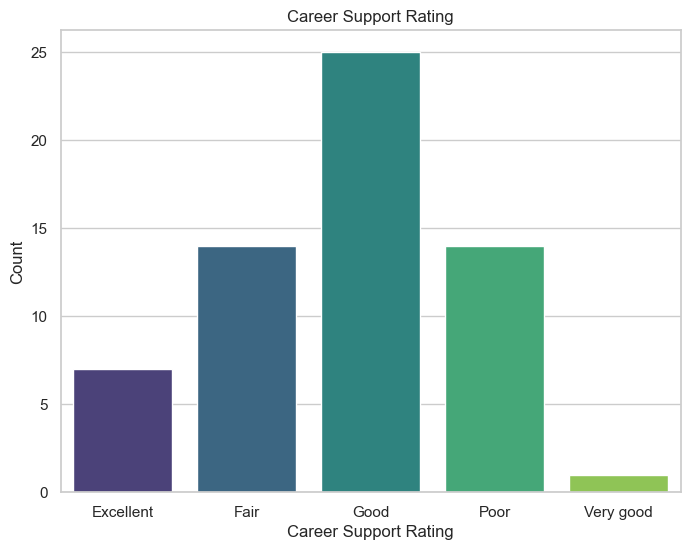

In [77]:
df['How would you rate the adequacy of your university\'s career support?'] = df['How would you rate the adequacy of your university\'s career support?'].astype('category')

# Création du countplot pour l'évaluation du soutien à la carrière universitaire
plt.figure(figsize=(8, 6))
sns.countplot(x="How would you rate the adequacy of your university's career support?", data=df, palette="viridis")
plt.title('Career Support Rating')
plt.xlabel('Career Support Rating')
plt.ylabel('Count')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\4260811285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='How did your integration within the team of the\xa0Internships go?', data=df, palette="Blues")


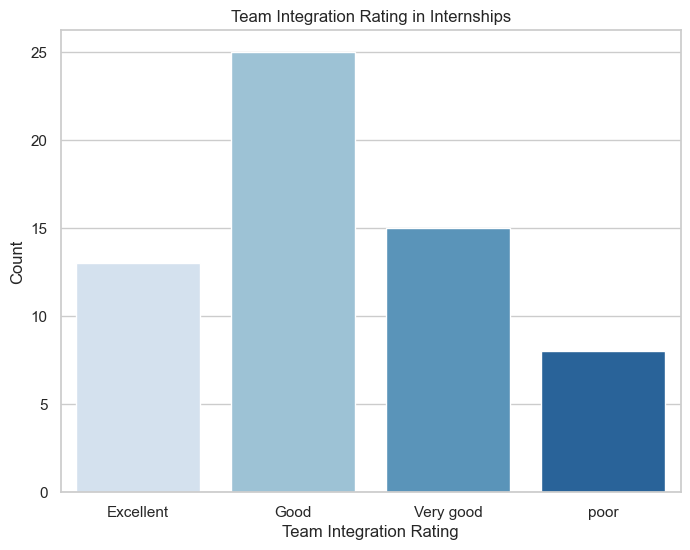

In [78]:
# Convert to categorical if it's not already
df['How did your integration within the team of the\xa0Internships go?'] = df['How did your integration within the team of the\xa0Internships go?'].astype('category')


plt.figure(figsize=(8, 6))
sns.countplot(x='How did your integration within the team of the\xa0Internships go?', data=df, palette="Blues")
plt.title('Team Integration Rating in Internships')
plt.xlabel('Team Integration Rating')
plt.ylabel('Count')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\796420712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Did you find that team members were available to answer\xa0your\xa0questions?', data=df, palette="coolwarm")


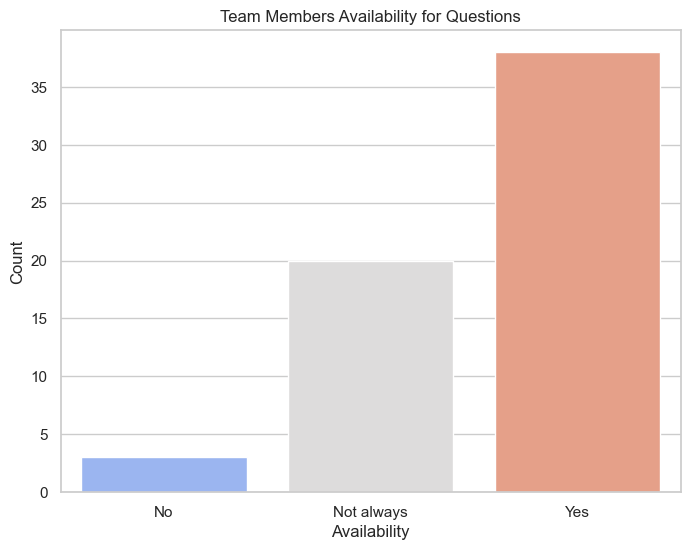

In [79]:
df['Did you find that team members were available to answer\xa0your\xa0questions?'] = df['Did you find that team members were available to answer\xa0your\xa0questions?'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(x='Did you find that team members were available to answer\xa0your\xa0questions?', data=df, palette="coolwarm")
plt.title('Team Members Availability for Questions')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.show()


In [80]:
# Check for hidden or newline characters by printing the exact byte representation
for col in df.columns:
    print(repr(col))  # This will show if there are any hidden characters


'ID'
'What is your gender?'
'What is your year of studies?'
'What is your field of study?'
'What is the typical duration of your internships ( in\xa0weeks )\xa0?'
'How many internships have you completed?'
'On a scale of 1 to 10, how important do you believe internships are in building your professional network?'
"How would you rate the adequacy of your university's career support?"
'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?'
'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?'
'How did your integration within the team of the\xa0Internships go?'
'Did you find that team members were available to answer\xa0your\xa0questions?'


**Numerical data**

In [81]:
# Select numerical columns
numerical_cols = [
    'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
    'How many internships have you completed?',
    'What is the typical duration of your internships ( in\xa0weeks )\xa0?',
    'On a scale of 1 to 10, how important do you believe internships are in building your professional network?',
    'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?'
]

# Create a numerical DataFrame for visualization
numerical_df = df[numerical_cols]


Histograms for Numerical Data


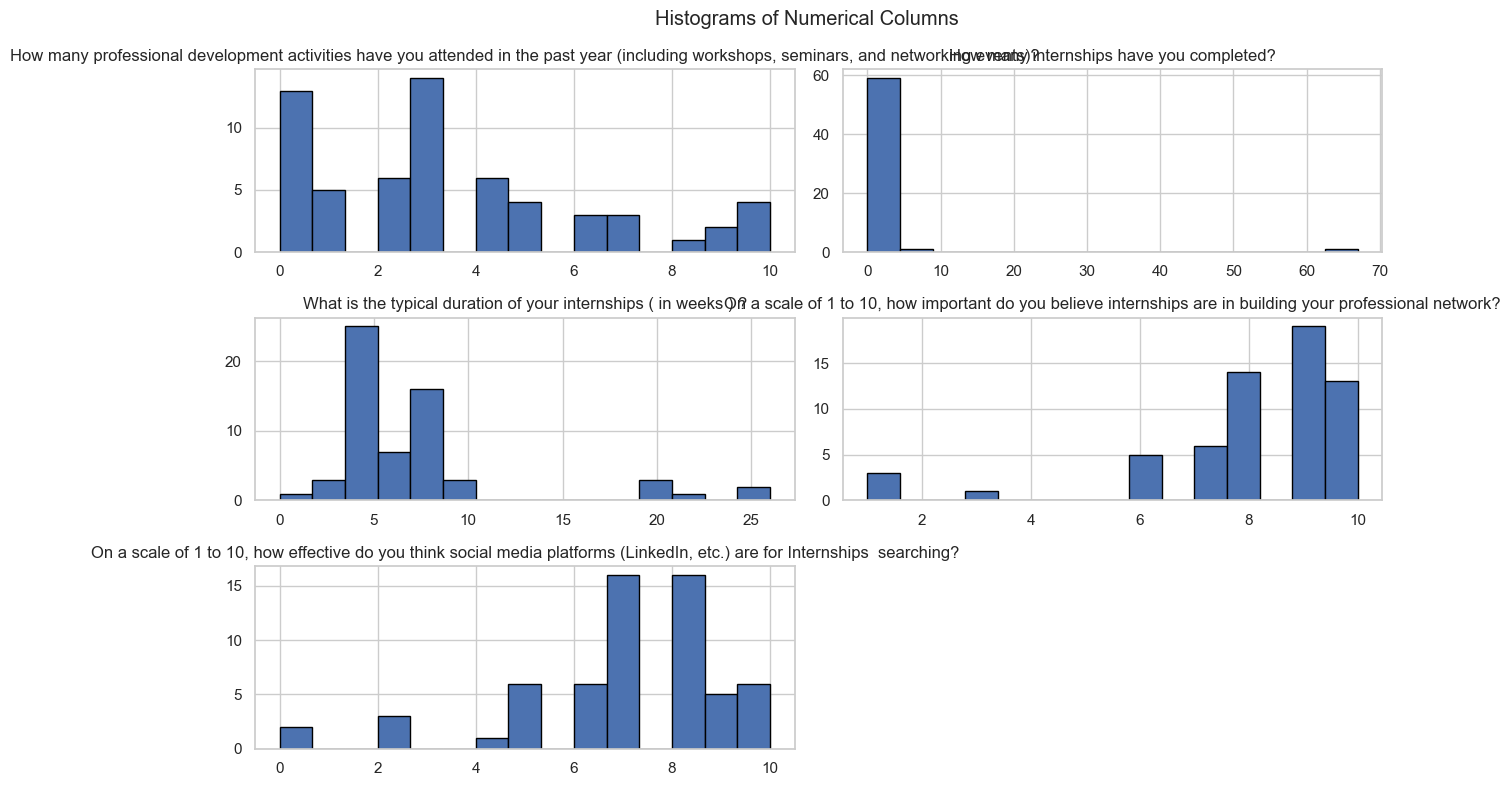

In [82]:
# Plot histograms for each numerical column
numerical_df.hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()


 Boxplots for Numerical Data


<Figure size 1200x600 with 0 Axes>

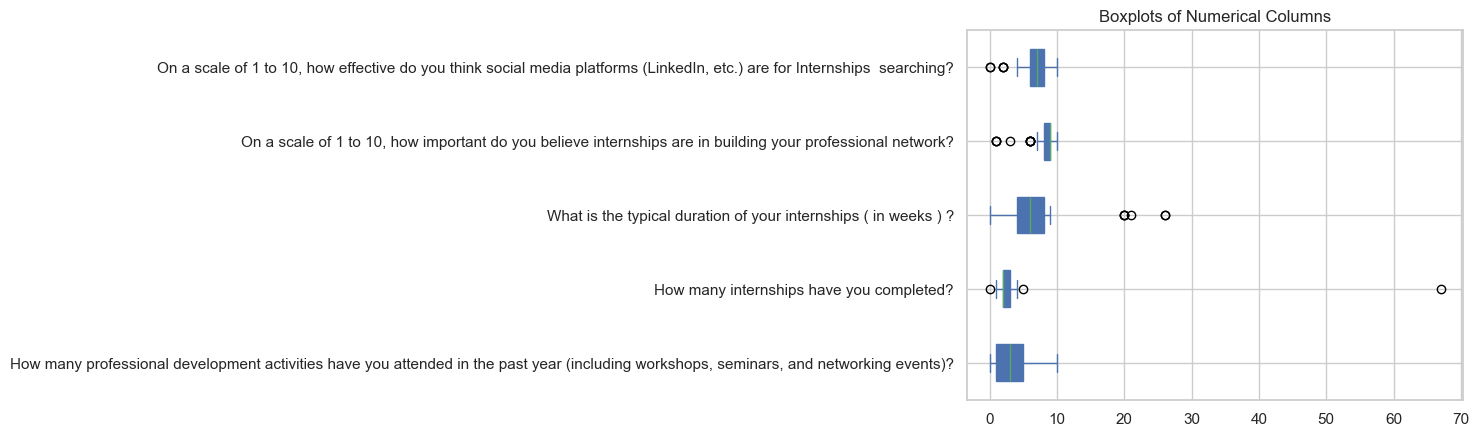

In [83]:
# Plot boxplots for each numerical column
plt.figure(figsize=(12, 6))
numerical_df.plot.box(grid=True, vert=False, patch_artist=True)
plt.title('Boxplots of Numerical Columns')
plt.show()


Correlation Heatmap
it help  understand the correlations between the numerical variables.

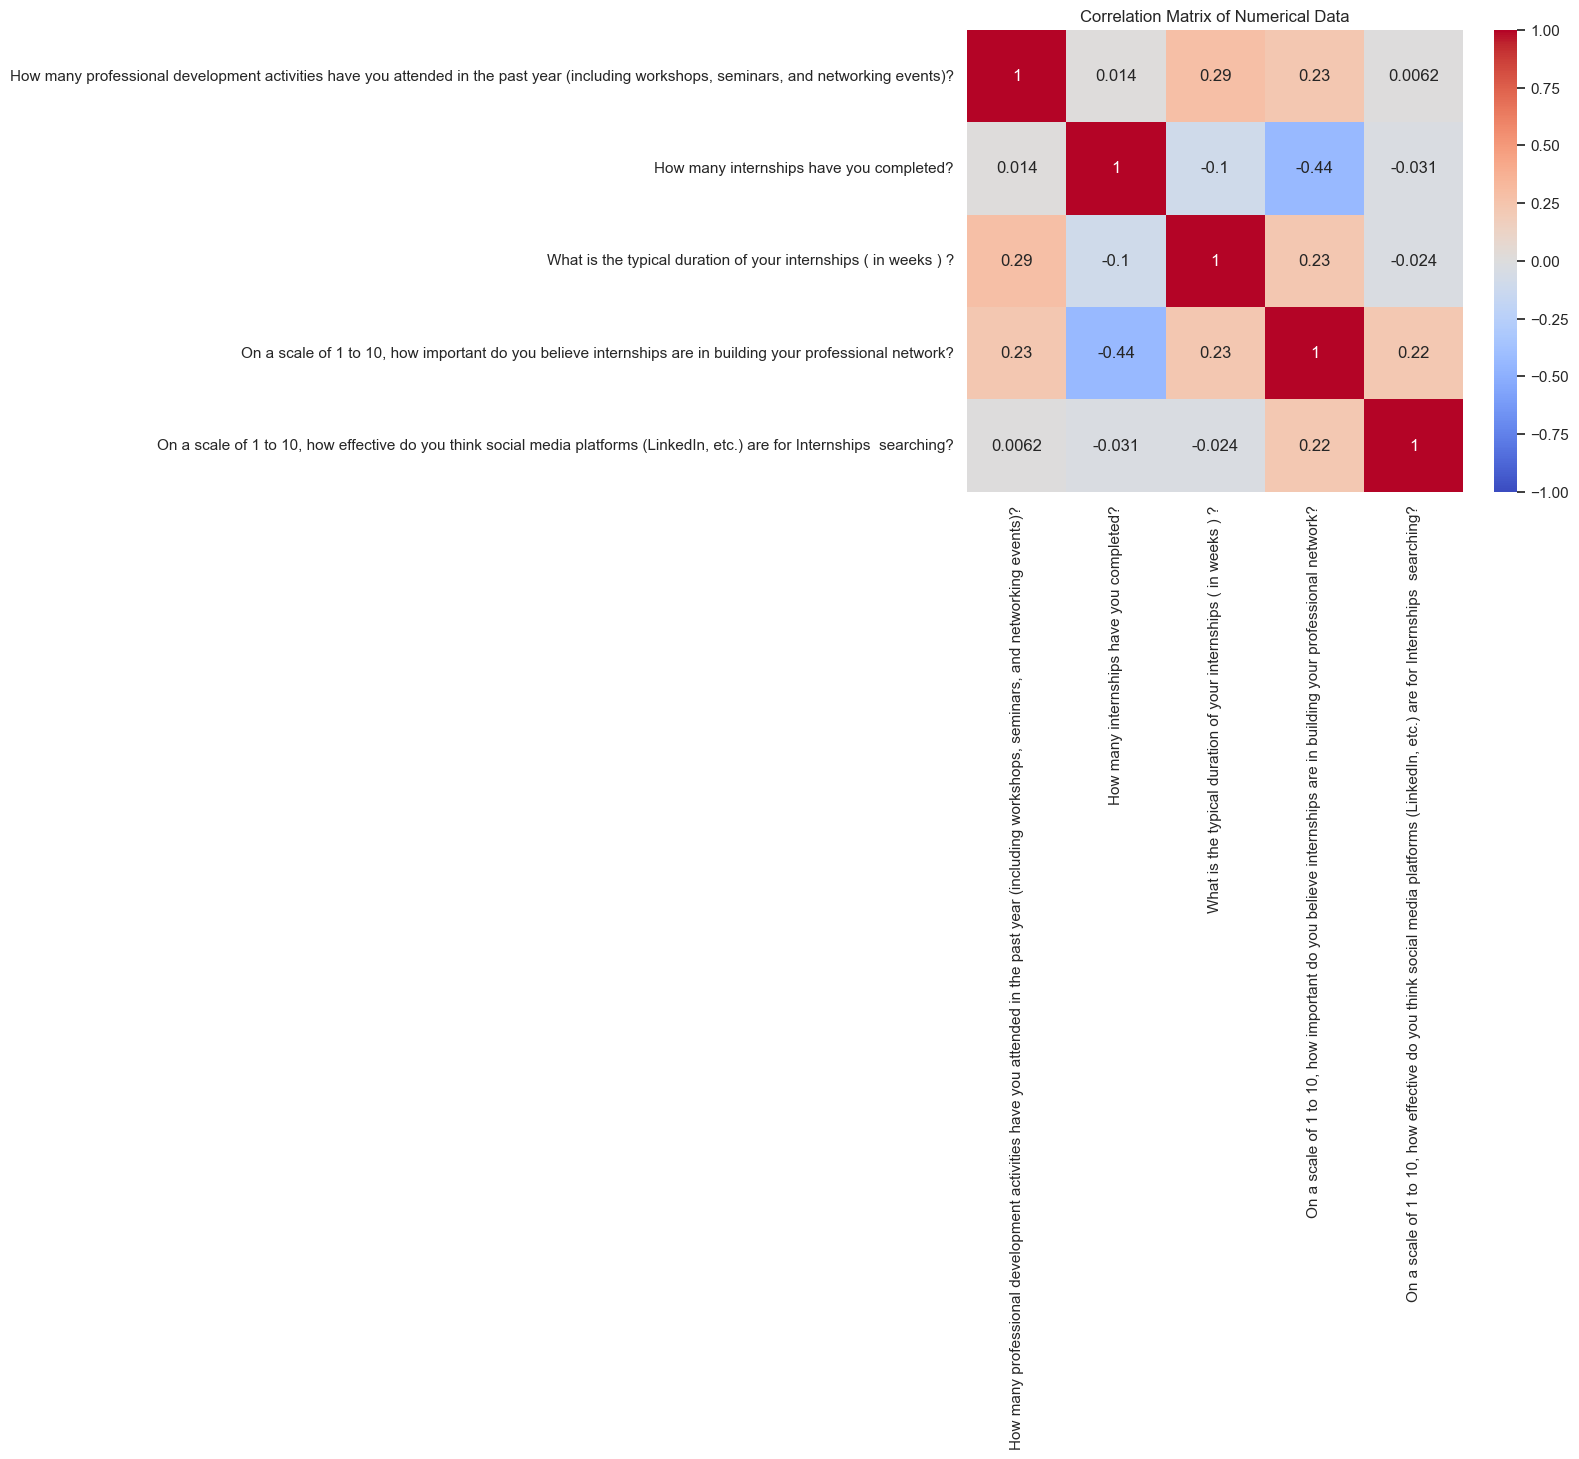

In [84]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Data')
plt.show()


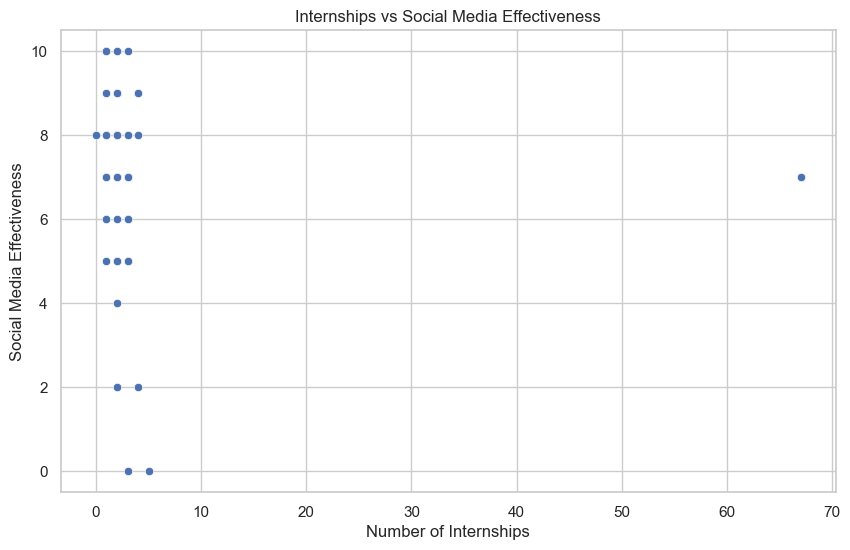

In [85]:
# Scatterplot for relationship between number of internships and social media effectiveness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numerical_df, x='How many internships have you completed?',
                y='On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?')
plt.title('Internships vs Social Media Effectiveness')
plt.xlabel('Number of Internships')
plt.ylabel('Social Media Effectiveness')
plt.show()


**This code generates a histogram with a KDE to show the distribution of responses to the question.**

 The histogram shows the frequency of each rating (from 1 to 10), while the KDE curve smooths out the distribution, making it easier to see the overall pattern.

In [86]:
df['How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?'] = pd.to_numeric(df['How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?'], errors='coerce')

df['How many internships have you completed?'] = pd.to_numeric(df['How many internships have you completed?'], errors='coerce')

df['What is the typical duration of your internships ( in\xa0weeks )\xa0?'] = pd.to_numeric(df['What is the typical duration of your internships ( in\xa0weeks )\xa0?'], errors='coerce')

df['On a scale of 1 to 10, how important do you believe internships are in building your professional network?'] = pd.to_numeric(df['On a scale of 1 to 10, how important do you believe internships are in building your professional network?'], errors='coerce')

df['On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?'] = pd.to_numeric(df['On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?'], errors='coerce')


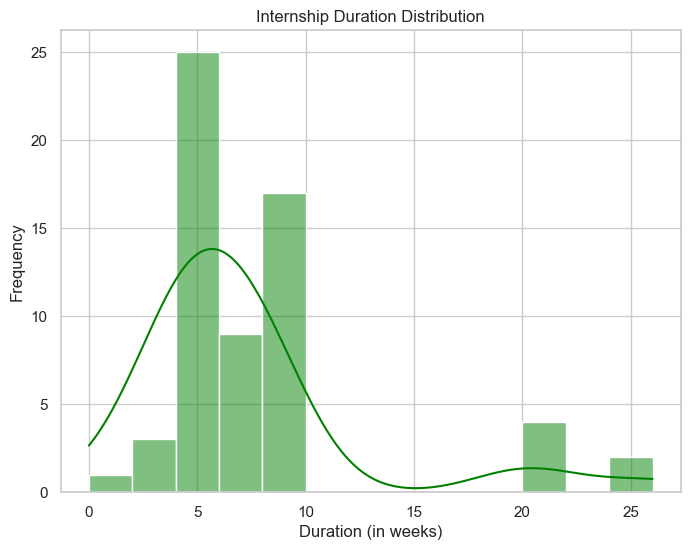

In [87]:
plt.figure(figsize=(8, 6))
sns.histplot(df['What is the typical duration of your internships ( in\xa0weeks )\xa0?'], kde=True, color='green')
plt.title('Internship Duration Distribution')
plt.xlabel('Duration (in weeks)')
plt.ylabel('Frequency')
plt.show()

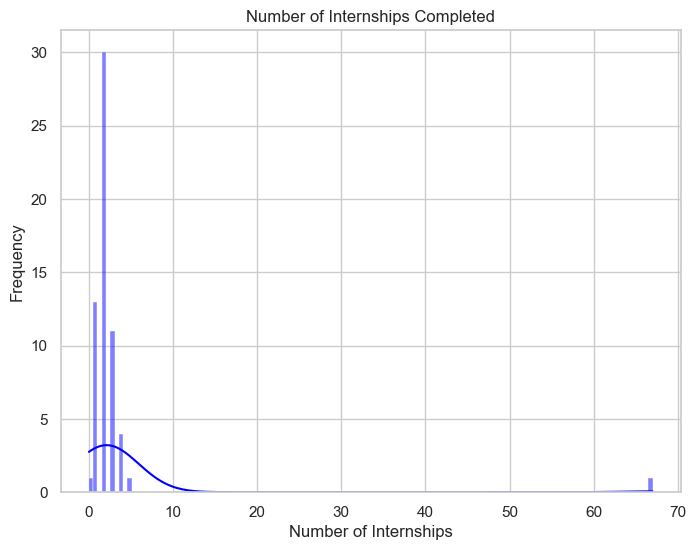

In [88]:
plt.figure(figsize=(8, 6))
sns.histplot(df['How many internships have you completed?'], kde=True, color='blue')
plt.title('Number of Internships Completed')
plt.xlabel('Number of Internships')
plt.ylabel('Frequency')
plt.show()


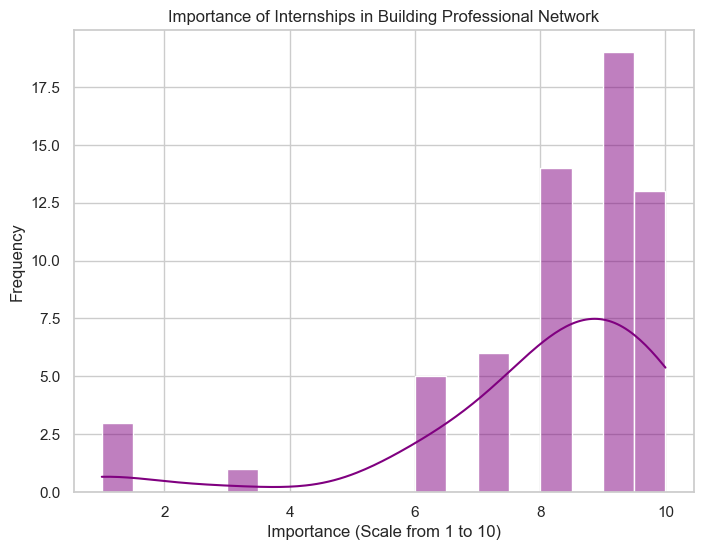

In [89]:
plt.figure(figsize=(8, 6))
sns.histplot(df['On a scale of 1 to 10, how important do you believe internships are in building your professional network?'], kde=True, color='purple')
plt.title('Importance of Internships in Building Professional Network')
plt.xlabel('Importance (Scale from 1 to 10)')
plt.ylabel('Frequency')
plt.show()


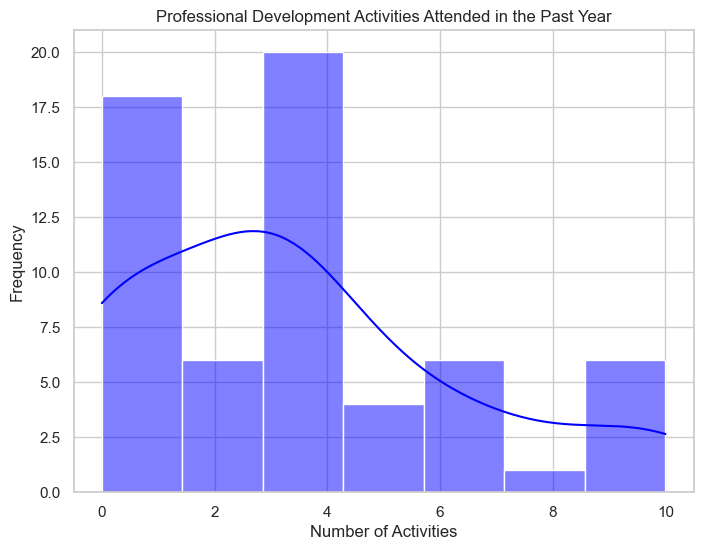

In [90]:
plt.figure(figsize=(8, 6))
sns.histplot(df['How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?'], kde=True, color='blue')
plt.title('Professional Development Activities Attended in the Past Year')
plt.xlabel('Number of Activities')
plt.ylabel('Frequency')
plt.show()


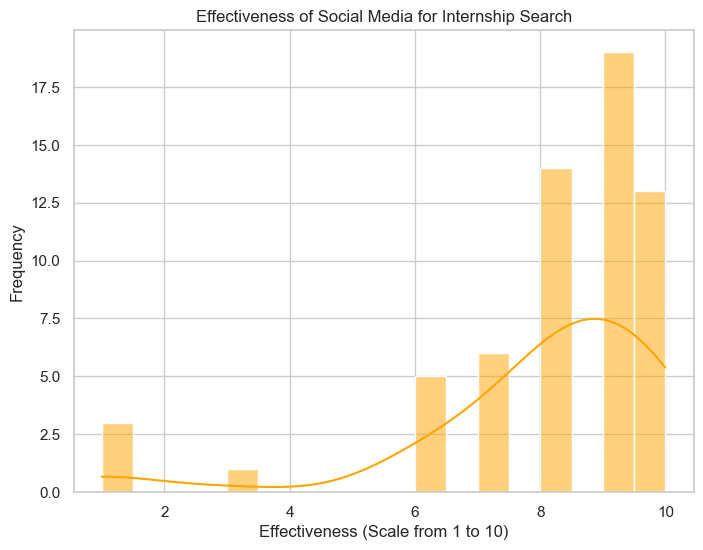

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(df['On a scale of 1 to 10, how important do you believe internships are in building your professional network?'], kde=True, color='orange')
plt.title('Effectiveness of Social Media for Internship Search')
plt.xlabel('Effectiveness (Scale from 1 to 10)')
plt.ylabel('Frequency')
plt.show()


# Hypotheses


### 1. **Gender and Internship Importance**
- **Observation:** The survey indicates how important respondents believe internships are for building a professional network, which is rated on a scale of 1 to 10.
- **Hypothesis:**
  - **H₀:** There is no significant difference in the perceived importance of internships between male and female respondents.
  - **H₁:** There is a significant difference in the perceived importance of internships between male and female respondents.

### 2. **Year of Studies and Internship Duration**
- **Observation:** The dataset includes information on the year of study and the typical duration of internships in weeks.
- **Hypothesis:**
  - **H₀:** There is no correlation between the year of study and the typical duration of internships.
  - **H₁:** There is a significant correlation between the year of study and the typical duration of internships.

### 3. **Field of Study and Internship Completion**
- **Observation:** The field of study and the number of completed internships are recorded.
- **Hypothesis:**
  - **H₀:** There is no relationship between the field of study and the number of internships completed.
  - **H₁:** There is a relationship between the field of study and the number of internships completed.

### 4. **Career Support Rating and Professional Development Activities**
- **Observation:** There is a rating of the adequacy of career support and the number of professional development activities attended.
- **Hypothesis:**
  - **H₀:** The rating of career support is not correlated with the number of professional development activities attended.
  - **H₁:** The rating of career support is positively correlated with the number of professional development activities attended.

### 5. **Internship Duration and Team Integration**
- **Observation:** The dataset contains ratings of how well respondents integrated into their internship teams and the typical duration of their internships.
- **Hypothesis:**
  - **H₀:** There is no relationship between internship duration and the level of team integration.
  - **H₁:** There is a significant relationship between internship duration and the level of team integration.

### 6. **Social Media Effectiveness and Internship Success**
- **Observation:** Social media platforms (like LinkedIn) are evaluated for their effectiveness in internship searches, and internship success can be inferred from the number of internships completed.
- **Hypothesis:**
  - **H₀:** There is no relationship between the perceived effectiveness of social media for internship searching and the number of internships completed.
  - **H₁:** There is a positive relationship between the perceived effectiveness of social media for internship searching and the number of internships completed.

### 7. **Availability of Team Members and Internship Success**
- **Observation:** The availability of team members for answering questions is recorded, and success could be indicated by internship completion.
- **Hypothesis:**
  - **H₀:** The availability of team members for answering questions does not influence the number of internships completed.
  - **H₁:** The availability of team members for answering questions positively influences the number of internships completed.



# TESTS

**1. Numerical vs. Numerical:**
*Importance of internships in building a professional network vs. Number of professional development activities attended*

H₀: There is no significant correlation between the importance of internships in building a professional network and the number of professional development activities attended.


H₁: here is a significant correlation between the importance of internships in building a professional network and the number of professional development activities attended.


Index(['ID', 'What is your gender?', 'What is your year of studies?',
       'What is your field of study?',
       'What is the typical duration of your internships ( in weeks ) ?',
       'How many internships have you completed?',
       'On a scale of 1 to 10, how important do you believe internships are in building your professional network?',
       'How would you rate the adequacy of your university's career support?',
       'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
       'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships  searching?',
       'How did your integration within the team of the Internships go?',
       'Did you find that team members were available to answer your questions?'],
      dtype='object')
Pearson Correlation: 0.2288
P-value: 0.0761


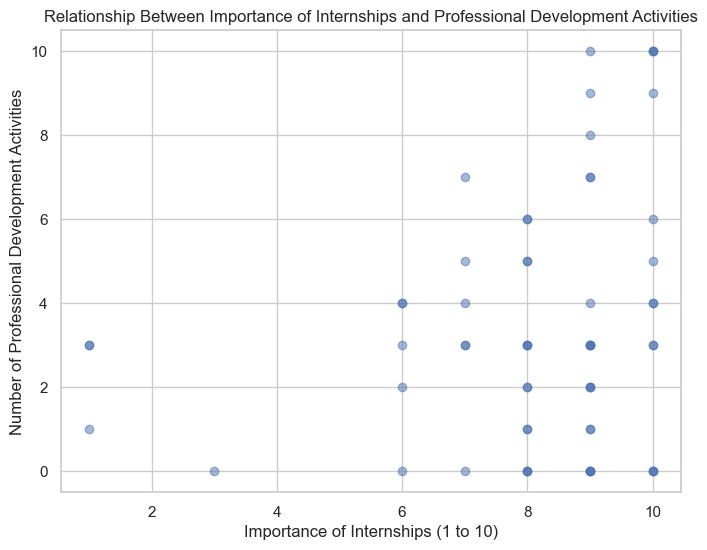

In [92]:
# Check the exact column name
from scipy import stats


print(df.columns)

# Ensure the column name matches exactly
importance_column = 'On a scale of 1 to 10, how important do you believe internships are in building your professional network?'
activities_column = 'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?'

# Check if the columns exist before proceeding
if importance_column in df.columns and activities_column in df.columns:
    correlation, p_value = stats.pearsonr(df[importance_column], df[activities_column])
    print(f"Pearson Correlation: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Scatter plot for visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(df[importance_column], df[activities_column], alpha=0.5)
    plt.title('Relationship Between Importance of Internships and Professional Development Activities')
    plt.xlabel('Importance of Internships (1 to 10)')
    plt.ylabel('Number of Professional Development Activities')
    plt.grid(True)
    plt.show()
else:
    print("One or both columns are missing. Check the column names.")


In [93]:
# Pearson Correlation (if data is continuous and normally distributed)
#pearson_corr, pearson_p_value = stats.pearsonr(df[importance_column], df[activities_column])

# Spearman Correlation (if data is not normally distributed or non-linear)
#spearman_corr, spearman_p_value = stats.spearmanr(df[importance_column], df[activities_column])

# Print the results
#print(f"Pearson Correlation: {pearson_corr:.4f}, P-value: {pearson_p_value:.4f}")
#print(f"Spearman Correlation: {spearman_corr:.4f}, P-value: {spearman_p_value:.4f}")


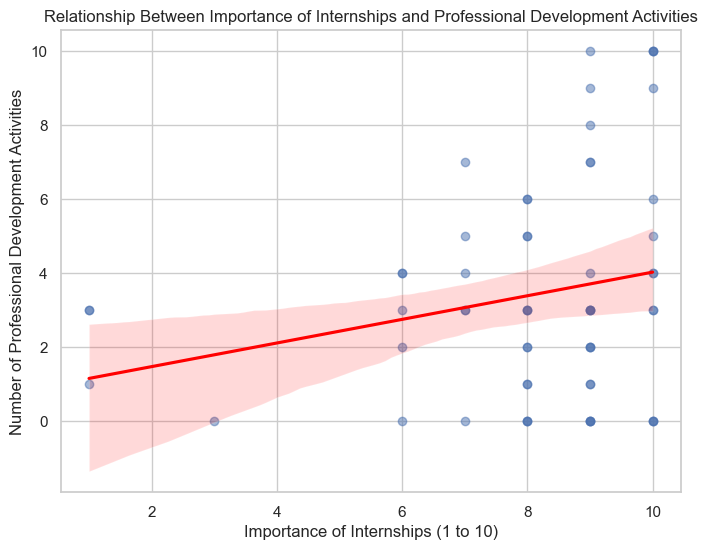

Pearson Correlation: 0.2288, P-value: 0.0761


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=importance_column, y=activities_column, data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Importance of Internships and Professional Development Activities')
plt.xlabel('Importance of Internships (1 to 10)')
plt.ylabel('Number of Professional Development Activities')
plt.show()

# Pearson Correlation
pearson_corr, pearson_p_value = pearsonr(df[importance_column], df[activities_column])
print(f"Pearson Correlation: {pearson_corr:.4f}, P-value: {pearson_p_value:.4f}")


**2. Numerical vs. Categorical:**
*Gender and Internship Importance*

H₀: There is no significant difference in the perceived importance of internships between male and female respondents.
H₁: There is a significant difference in the perceived importance of internships between male and female respondents.

In [95]:

from scipy.stats import f_oneway

# Split the data by gender
male_data = df[df['What is your gender?'] == 'Male']['On a scale of 1 to 10, how important do you believe internships are in building your professional network?']
female_data = df[df['What is your gender?'] == 'Female']['On a scale of 1 to 10, how important do you believe internships are in building your professional network?']

# You can add more groups if necessary (e.g., other gender categories, or multiple levels within a single column)

# Perform one-way ANOVA
stat, p_value = f_oneway(male_data, female_data)

# Display results
print(f"ANOVA Test p-value: {p_value}")

# Check if we reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in internship importance between gender groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in internship importance between gender groups.")


ANOVA Test p-value: nan
Fail to reject the null hypothesis: There is no significant difference in internship importance between gender groups.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\4256498839.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = f_oneway(male_data, female_data)


**3. Categorical vs. Categorical:** *Gender and Integration into the Internship Team:*


Hypothesis: Is there a difference in how males and females rate their integration into the internship team?

H₀: There is no significant relationship between gender and integration into the internship team.
H₁: There is a significant relationship between gender and integration into the internship team.

In [96]:
# Clean up column names by replacing non-breaking spaces with regular spaces
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)

# Preview the cleaned column names
print("\nCleaned column names:")
print(df.columns)



Cleaned column names:
Index(['ID', 'What is your gender?', 'What is your year of studies?',
       'What is your field of study?',
       'What is the typical duration of your internships ( in weeks ) ?',
       'How many internships have you completed?',
       'On a scale of 1 to 10, how important do you believe internships are in building your professional network?',
       'How would you rate the adequacy of your university's career support?',
       'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
       'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships  searching?',
       'How did your integration within the team of the Internships go?',
       'Did you find that team members were available to answer your questions?'],
      dtype='object')


In [97]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(gender_integration['What is your gender?'],
                                gender_integration['How did your integration within the team of the Internships go?'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Plot the contingency table as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu", cbar=False, xticklabels=True, yticklabels=True)
plt.title('Contingency Table: Gender vs Integration into Internship Team')
plt.xlabel('Integration into the Internship Team')
plt.ylabel('Gender')
plt.show()

# Apply the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:")
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))

# Interpretation of the result
if p_value < 0.05:
    print("\nThere is a statistically significant association between gender and integration into the internship team.")
else:
    print("\nThere is no statistically significant association between gender and integration into the internship team.")


NameError: name 'gender_integration' is not defined

**4.Regression Analysis:** *Hypothesis for Internship Duration and Field of Study Predicting Professional Development Activities*

Dependent Variable (Y): Number of professional development activities attended.
Independent Variables (X₁, X₂):
Internship duration (numerical).
Field of study (categorical).


Null Hypothesis (H₀):
Neither internship duration nor field of study predicts the number of professional development activities attended.

Alternative Hypothesis (H₁):
At least one of the predictors (internship duration or field of study) significantly predicts the number of professional development activities attended.

In [ ]:
df['Field of study'] = df['What is your field of study?'].astype('category')

# Handle categorical variables by encoding them
label_encoder = LabelEncoder()
df['Field of study_encoded'] = label_encoder.fit_transform(df['Field of study'])

# Now, let's select the features (independent variables) and the target (dependent variable)
# Make sure all values are numeric for the regression model
X = df[['What is the typical duration of your internships ( in weeks ) ?', 'Field of study_encoded']]
Y = df['How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Display the model summary
print(model.summary())

                                                                                       OLS Regression Results                                                                                      
Dep. Variable:     How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?   R-squared:                       0.032
Model:                                                                                                                                                 OLS   Adj. R-squared:                 -0.002
Method:                                                                                                                                      Least Squares   F-statistic:                    0.9513
Date:                                                                                                                                     Sun, 01 Dec 2024   Prob (F-statistic):              0.392
Time:               

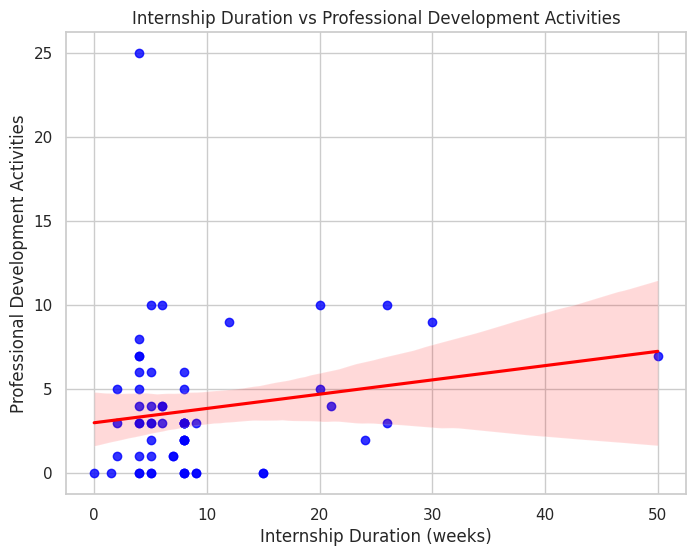

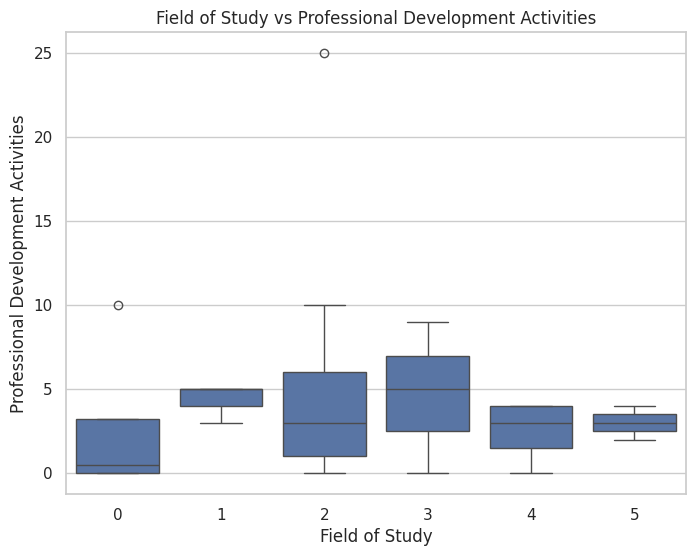

In [ ]:
# Visualize the relationship between internship duration and professional development activities
plt.figure(figsize=(8, 6))
sns.regplot(x='What is the typical duration of your internships ( in weeks ) ?',
            y='How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
            data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Internship Duration vs Professional Development Activities')
plt.xlabel('Internship Duration (weeks)')
plt.ylabel('Professional Development Activities')
plt.show()

# Visualize the relationship between field of study and professional development activities
plt.figure(figsize=(8, 6))
sns.boxplot(x='Field of study_encoded',
            y='How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
            data=df)
plt.title('Field of Study vs Professional Development Activities')
plt.xlabel('Field of Study')
plt.ylabel('Professional Development Activities')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/Internships.xlsx'  # Replace with the correct path if needed
df = pd.read_excel(file_path)
df.head()


,ID,Start time,Completion time,Email,Name,Last modified time,What is your gender?\n,What is your year of studies?\n,What is your field of study?,What is the typical duration of your internships ( in weeks ) ?,How many internships have you completed?\n,"On a scale of 1 to 10, how important do you believe internships are in building your professional network?",How would you rate the adequacy of your university's career support?\n,"How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?","On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships searching?",How did your integration within the team of the Internships go?,Did you find that team members were available to answer your questions?
0,1,2024-11-13 11:26:49,2024-11-13 11:28:09,anonymous,NaN,NaN,Man,4th year,Engineering,5,2,8,Poor,3,7,Good,Not always
1,2,2024-11-13 11:27:51,2024-11-13 11:30:38,anonymous,NaN,NaN,Woman,4th year,Engineering,6,1,10,Good,10,10,Very good,Yes
2,3,2024-11-13 11:29:23,2024-11-13 11:35:05,anonymous,NaN,NaN,Man,3rd year,health field,4,2,10,Good,4,8,Excellent,Yes
3,4,2024-11-13 11:30:27,2024-11-13 11:35:37,anonymous,NaN,NaN,Woman,4th year,Engineering,7,1,9,Good,1,5,poor,Not always
4,5,2024-11-13 11:41:19,2024-11-13 11:43:02,anonymous,NaN,NaN,Man,5th year or more,Architecture,5,3,10,Good,10,5,Very good,Yes


In [6]:
# Drop unnecessary columns
columns_to_drop = ['Email', 'Name', 'Start time', 'Completion time', 'Last modified time']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')


In [7]:
# Target variable
target_column = 'How did your integration within the team of the\xa0Internships go?'
y = df_cleaned[target_column]

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y.fillna('Unknown'))

# Identify numerical and categorical features
numerical_features = [
    'What is the typical duration of your internships ( in\xa0weeks )\xa0?',
    'How many internships have you completed?\n',
    'On a scale of 1 to 10, how important do you believe internships are in building your professional network?\xa0',
    'How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?',
    'On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships\xa0 searching?'
]

categorical_features = [
    'What is your gender?\n',
    'What is your year of studies?\n',
    'What is your field of study?',
    'How would you rate the adequacy of your university\'s career support?\n',
    'Did you find that team members were available to answer\xa0your\xa0questions?'
]

In [8]:

# Handle missing values for numerical features
X_numerical = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].mean())

# Handle missing values for categorical features
X_categorical = df_cleaned[categorical_features].fillna('Unknown')

# One-Hot Encode categorical features (handling unknowns)
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Use sparse=False, handle_unknown='ignore'
X_categorical_encoded = one_hot_encoder.fit_transform(X_categorical)
X_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=one_hot_encoder.get_feature_names_out(X_categorical.columns)) # Get feature names from X_categorical.columns

# Combine numerical and encoded categorical features
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)


In [9]:
# Aperçu des données nettoyées
df_cleaned.info()

# Visualiser un échantillon des données
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                   --------------  ----- 
 0   ID                                                                                                                                       61 non-null     int64 
 1   What is your gender?
                                                                                                                    61 non-null     object
 2   What is your year of studies?
                                                                                                           61 non-null     object
 3   What is your field of study?                                       

,ID,What is your gender?\n,What is your year of studies?\n,What is your field of study?,What is the typical duration of your internships ( in weeks ) ?,How many internships have you completed?\n,"On a scale of 1 to 10, how important do you believe internships are in building your professional network?",How would you rate the adequacy of your university's career support?\n,"How many professional development activities have you attended in the past year (including workshops, seminars, and networking events)?","On a scale of 1 to 10, how effective do you think social media platforms (LinkedIn, etc.) are for Internships searching?",How did your integration within the team of the Internships go?,Did you find that team members were available to answer your questions?
0,1,Man,4th year,Engineering,5,2,8,Poor,3,7,Good,Not always
1,2,Woman,4th year,Engineering,6,1,10,Good,10,10,Very good,Yes
2,3,Man,3rd year,health field,4,2,10,Good,4,8,Excellent,Yes
3,4,Woman,4th year,Engineering,7,1,9,Good,1,5,poor,Not always
4,5,Man,5th year or more,Architecture,5,3,10,Good,10,5,Very good,Yes


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.6153846153846154


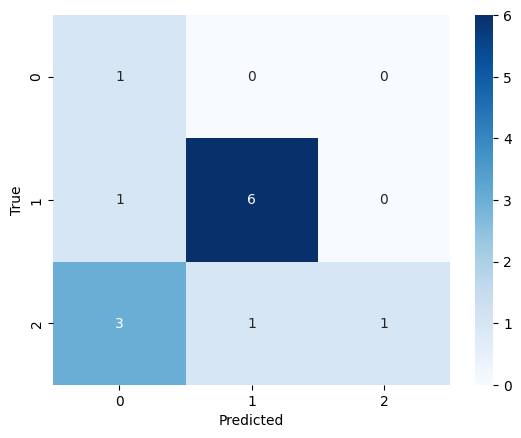

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2440584504.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2440584504.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

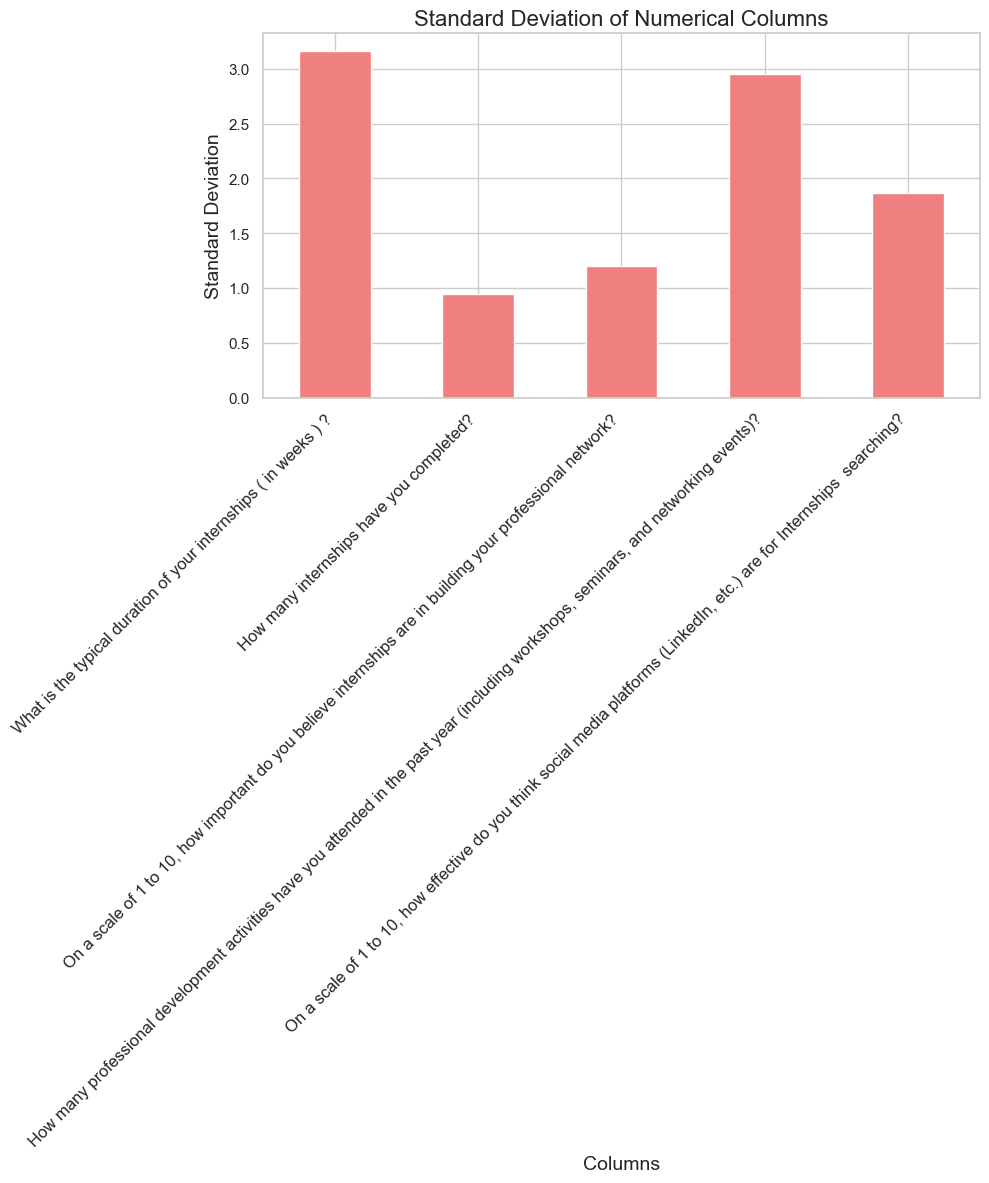

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2440584504.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your gender?', data=df, palette="Set2")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2440584504.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your year of studies?', data=df, palette="Set3")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23404\2440584504.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='What is your field of study?', data=df, palette="Set1")
C:\Users\Lenovo\AppData\Lo

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create a folder to store the plots
output_folder = "./static/images"
os.makedirs(output_folder, exist_ok=True)

# 1 Save Mean of Numerical Columns with Improved Labels
# Save Mean of Numerical Columns
plt.figure(figsize=(10, 12))  # Adjust figure size for better proportions
numerical_stats.loc['mean'].plot(kind='bar', color='lightblue')  # Plot the mean values
plt.title('Mean of Numerical Columns', fontsize=16)  # Set title with larger font size
plt.xlabel('Columns', fontsize=14)  # Set x-axis label font size
plt.ylabel('Mean Value', fontsize=14)  # Set y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure layout fits properly
plt.savefig('./static/images/mean_numerical_improved.png', dpi=300)  # Save the plot with high DPI
plt.show()  # Display the plot in the notebook


# 2. Save Boxplots for Variability Across Numerical Columns
plt.figure(figsize=(12, 8))
numerical_df.plot(kind='box', vert=False, color='lightblue', patch_artist=True)
plt.title('Boxplots for Variability Across Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'boxplots_variability.png'))
plt.close()

# 3 Save Standard Deviation of Numerical Columns with Improved Labels
# Save Standard Deviation of Numerical Columns
plt.figure(figsize=(10, 12))  # Set figure size to match the original proportions
numerical_stats.loc['std'].plot(kind='bar', color='lightcoral')  # Plot standard deviation
plt.title('Standard Deviation of Numerical Columns', fontsize=16)  # Title with larger font
plt.xlabel('Columns', fontsize=14)  # X-axis label with larger font
plt.ylabel('Standard Deviation', fontsize=14)  # Y-axis label with larger font
plt.xticks(rotation=45, ha='right', fontsize=12)  # X-axis ticks rotated and with larger font
plt.tight_layout()  # Ensure layout fits perfectly
plt.savefig('./static/images/std_deviation_improved.png', dpi=300)  # Save the plot
plt.show()  # Display the plot in the notebook


# 4. Save Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your gender?', data=df, palette="Set2")
plt.title('Gender Distribution of Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'gender_distribution.png'))
plt.close()

# 5. Save Year of Studies Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your year of studies?', data=df, palette="Set3")
plt.title('Year of Studies Distribution')
plt.xlabel('Year of Studies')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'year_of_studies.png'))
plt.close()

# 6. Save Field of Study Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your field of study?', data=df, palette="Set1")
plt.title('Field of Study Distribution')
plt.xlabel('Field of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'field_of_study.png'))
plt.close()

# 7. Save Career Support Rating
plt.figure(figsize=(8, 6))
sns.countplot(x="How would you rate the adequacy of your university's career support?", data=df, palette="viridis")
plt.title('Career Support Rating')
plt.xlabel('Career Support Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'career_support_rating.png'))
plt.close()

# 8. Save Team Integration Rating
plt.figure(figsize=(8, 6))
sns.countplot(x='How did your integration within the team of the Internships go?', data=df, palette="Blues")
plt.title('Team Integration Rating in Internships')
plt.xlabel('Team Integration Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./static/images/team_integration.png')
plt.close()


# 9. Save Team Members Availability for Questions
plt.figure(figsize=(8, 6))
sns.countplot(x='Did you find that team members were available to answer your questions?', data=df, palette="coolwarm")
plt.title('Team Members Availability for Questions')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('./static/images/team_availability.png')
plt.close()
